**Connect with google drive**

In [178]:
!pip install yfinance 

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step_1: Get the data of 20 companies from yahoo web and store in google drive**

In [180]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
#datetime is a Python module
import datetime

# Set the start and end date
start_date = '2017-01-01'

#start_date = '2017-01-01'
# Get data to today
today = datetime.datetime.today()
# Set the list including 20'str' acronym of 20 companies
list = ['INTC','AMD', 'CSCO', 'AAPL', 'MU', 'NVDA', 'QCOM', 'AMZN', 'NFLX', 'FB', 'GOOG', 'BABA', 'EBAY', 'IBM', 'XLNX', 'TXN', 'NOK', 'TSLA', 'MSFT', 'SNPS']

# Get the data
files=[]

# Create a data folder in my google drive.
def SaveData(df, filename):
  df.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/'+filename+'.csv')

def GetData(acronym):
  print (acronym)
  data = pdr.get_data_yahoo(acronym, start = start_date, end = today )
  dataname= acronym
  files.append(dataname)
  SaveData(data, dataname)

print("Today is " + str(today))
#Get data, and save that data as "str".csv
for i in list:
  GetData(i)
  

Today is 2021-07-20 17:14:59.432603
INTC
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
MU
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
QCOM
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
FB
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed
BABA
[*********************100%***********************]  1 of 1 completed
EBAY
[*********************100%***********************]  1 of 1 completed
IBM
[**

### Requirement: 
30 ngày liên tiếp là input đầu vào của cột Adj => Predict ra cho ngày 31 

**Step_2: Working with LSTM model**

In [181]:
# import library
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

In [182]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/AAPL.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.413372,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.382690,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600


In [183]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1.144000e+03
mean,66.758105,67.493492,66.039515,66.801663,65.713227,1.247182e+08
std,33.479628,33.915285,32.976289,33.462594,33.951393,5.684807e+07
min,28.950001,29.082500,28.690001,29.004999,27.382690,4.544800e+07
25%,42.525002,42.906251,42.143751,42.440001,40.937766,8.670200e+07
50%,51.073750,51.608749,50.771250,51.128750,50.106915,1.090156e+08
75%,81.060001,81.551252,80.419374,81.248127,80.461071,1.457304e+08
max,149.240005,150.000000,147.679993,149.149994,149.149994,4.479400e+08


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1144 non-null   object 
 1   Open       1144 non-null   float64
 2   High       1144 non-null   float64
 3   Low        1144 non-null   float64
 4   Close      1144 non-null   float64
 5   Adj Close  1144 non-null   float64
 6   Volume     1144 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.7+ KB


In [185]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.413372,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.382690,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600
...,...,...,...,...,...,...,...
1139,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
1140,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300
1141,2021-07-16,148.460007,149.759995,145.880005,146.389999,146.389999,93100300
1142,2021-07-19,143.750000,144.070007,141.669998,142.449997,142.449997,121295300


In [186]:
# check null
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [187]:
# Create new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
# Split train data, test data (8:2)
training_data_len = int(np.ceil( len(dataset) * .8 ))

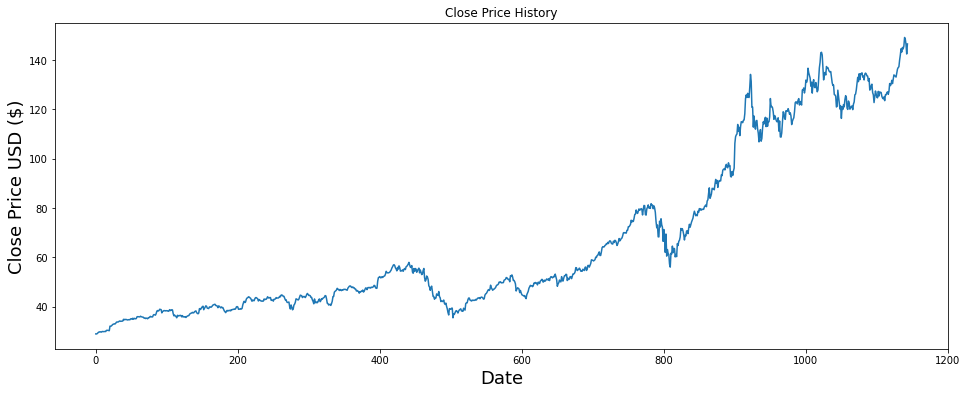

In [188]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [189]:
dataset.shape

(1144, 1)

In [190]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.70516643e-04],
       [0.00000000e+00],
       [1.22769153e-03],
       ...,
       [9.77027803e-01],
       [9.44234073e-01],
       [9.78151399e-01]])

In [191]:
# Create the train dataset
train_data = scaled_data[0:int(training_data_len), :]
X_train = []
y_train = []

for i in range(30, len(train_data)):
  X_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<=30:
    print(X_train)
    print(y_train)
    print()

# Convert X_train, y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[array([0.00027052, 0.        , 0.00122769, 0.00393276, 0.00618004,
       0.00642974, 0.00776146, 0.00672105, 0.00628408, 0.00828167,
       0.00826085, 0.00782388, 0.00828167, 0.00844814, 0.00821924,
       0.0121936 , 0.01231846, 0.01233926, 0.0116734 , 0.01109077,
       0.02648883, 0.02603105, 0.02717551, 0.02969328, 0.03227351,
       0.03333472, 0.03412544, 0.03350118, 0.03593574, 0.03953558])]
[0.04055515984382363]



In [192]:
X_train.shape

(886, 30, 1)

In [193]:
y_train.shape

(886,)

In [194]:
# Create the testing data set
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
X_test = np.array(x_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [195]:
X_test.shape

(228, 30, 1)

In [196]:
y_test.shape

(228, 1)

In [198]:
# Build model LSTM
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(30, 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Summary
print(model.summary())

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 30, 256)           264192    
_________________________________________________________________
lstm_34 (LSTM)               (None, 30, 128)           197120    
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_20 (Dense)             (None, 25)                1625      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 26        
Total params: 512,371
Trainable params: 512,371
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
28/28 [==============================] - 4s 10ms/step - loss: 0.0061
Epoch 2/500
28/28 [========

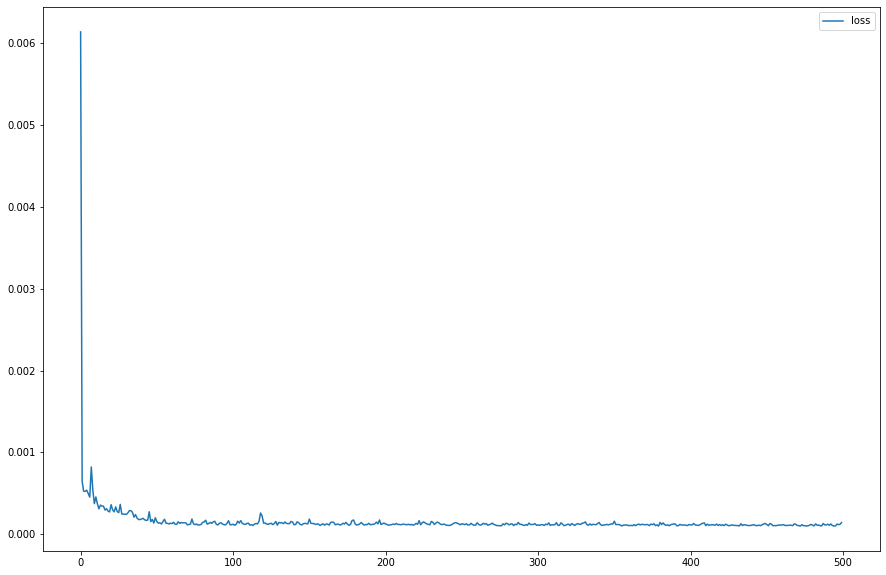

In [199]:
# Plot
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='best')
plt.show()

**Step_3: Get results**

In [200]:
# Get the models predicted price values 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Transformback to original form
train_predict_scaler = scaler.inverse_transform(train_predict)
test_predict_scaler = scaler.inverse_transform(test_predict)

**Step_4: Check**

In [201]:
import math
RMSE_train = np.sqrt(np.mean(((train_predict - y_train) ** 2)))
RMSE_train

0.19619844171850662

In [202]:
RMSE_test = np.sqrt(np.mean(((test_predict - y_test) ** 2)))
RMSE_test

125.50566967012749

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


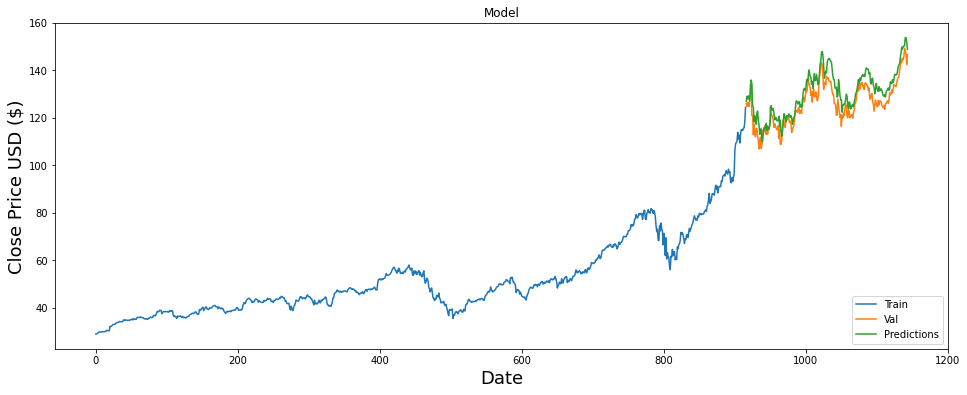

In [204]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = test_predict_scaler
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()